In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [2]:
# Step 1: Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 2: Reshape and Normalize
img_rows, img_cols = 28, 28

if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# Step 3: One-Hot Encode Labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# Step 4: Build CNN Model
input_layer = Input(shape=inpx)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
conv2 = Conv2D(64, (3, 3), activation='relu')(conv1)
pool = MaxPooling2D(pool_size=(2, 2))(conv2)
drop = Dropout(0.5)(pool)
flat = Flatten()(drop)
dense1 = Dense(128, activation='relu')(flat)
output_layer = Dense(10, activation='softmax')(dense1)

model = Model(inputs=input_layer, outputs=output_layer)

In [6]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Step 6: Train the Model
model.fit(x_train, y_train, batch_size=500, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6934 - loss: 0.8719 - val_accuracy: 0.8613 - val_loss: 0.3981
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8656 - loss: 0.3756 - val_accuracy: 0.8877 - val_loss: 0.3225
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.8864 - loss: 0.3218 - val_accuracy: 0.8980 - val_loss: 0.2871
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.8988 - loss: 0.2825 - val_accuracy: 0.9038 - val_loss: 0.2670
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9047 - loss: 0.2642 - val_accuracy: 0.9077 - val_loss: 0.2565
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9119 - loss: 0.2442 - val_accuracy: 0.9100 - val_loss: 0.2495
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9213 - loss: 0.2184 - val_accuracy: 0.9188 - val_loss: 0.2303
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.9219 - loss: 0.2121 - val_accu

In [8]:
fashion_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted: Trouser
Actual: Trouser


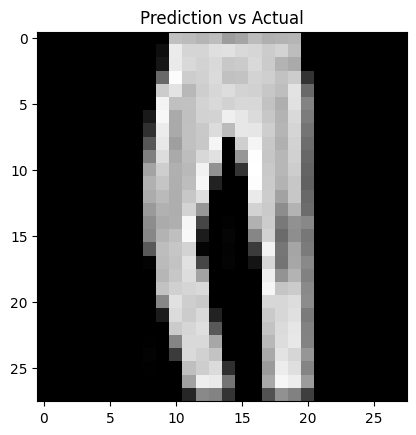

In [9]:
import matplotlib.pyplot as plt

# Predict one test image
index = 5
prediction = model.predict(np.expand_dims(x_test[index], axis=0))
predicted_class = np.argmax(prediction)
actual_class = np.argmax(y_test[index])

print("Predicted:", fashion_labels[predicted_class])
print("Actual:", fashion_labels[actual_class])

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Prediction vs Actual")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


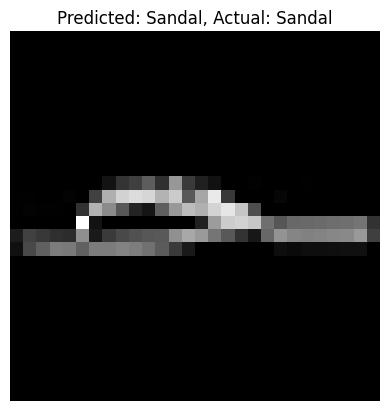

In [10]:
# Class labels
fashion_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Predict a test image
index = 8
pred = model.predict(np.expand_dims(x_test[index], axis=0))
pred_class = np.argmax(pred)
true_class = np.argmax(y_test[index])

# Display prediction
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {fashion_labels[pred_class]}, Actual: {fashion_labels[true_class]}")
plt.axis('off')
plt.show()